In [65]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [66]:
x=np.arange(0,20,1)
y=1+x**2
X=x.reshape(-1,1)
print(x)
print(y)
print(X)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[  1   2   5  10  17  26  37  50  65  82 101 122 145 170 197 226 257 290 325 362]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]


In [67]:
def cost_function(x,y,w,b):
    m=x.shape[0]
    f_wb= np.dot(x,w)+b
    cost= np.sum((f_wb-y)**2)/(2*m)
    return cost

In [68]:
def calculate_derivatives(x,y,w,b):
    m,n=x.shape
    f_wb= np.dot(x,w)+b
    dj_db= np.sum(f_wb-y)/m
    dj_dw= np.dot(f_wb-y,x)/m
    return dj_dw, dj_db

In [71]:
def gradient_descent(x,y,alpha,iterations):
    m,n=x.shape
    w=np.zeros(n)
    b=0
    cost_history=[]
    
    for i in range(iterations):
        dj_dw,dj_db=calculate_derivatives(x,y,w,b)
        w-= alpha*dj_dw
        b-= alpha*dj_db
        
        #printing
        if(i<100000):
            cost_history.append(cost_function(x,y,w,b))
        if i%math.ceil(iterations/10)==0:
            print(f"Iteration {i:4d}: Cost{cost_history[-1]:0.5e}")
    
    print(f"w={w}, b={b}")
    return w,b

In [72]:
w,b= gradient_descent(X,y,1e-2,1000)

Iteration    0: Cost1.65756e+03
Iteration  100: Cost6.94549e+02
Iteration  200: Cost5.88475e+02
Iteration  300: Cost5.26414e+02
Iteration  400: Cost4.90103e+02
Iteration  500: Cost4.68858e+02
Iteration  600: Cost4.56428e+02
Iteration  700: Cost4.49155e+02
Iteration  800: Cost4.44900e+02
Iteration  900: Cost4.42411e+02
w=[18.69806954], b=-52.08341025448668


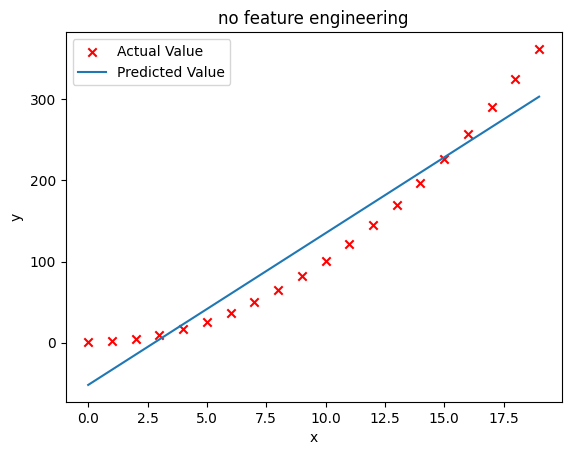

In [73]:
#plot of real values, and predicted value= x*w+b
plt.scatter(x, y, marker='x', color='red', label="Actual Value")
plt.plot(x, np.dot(X,w)+b, label="Predicted Value")

plt.title("no feature engineering")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [74]:
#engineer feature
X=X**2
print(X)

[[  0]
 [  1]
 [  4]
 [  9]
 [ 16]
 [ 25]
 [ 36]
 [ 49]
 [ 64]
 [ 81]
 [100]
 [121]
 [144]
 [169]
 [196]
 [225]
 [256]
 [289]
 [324]
 [361]]


In [75]:
w,b= gradient_descent(X,y,1e-5,100000)

Iteration    0: Cost7.32922e+03
Iteration 10000: Cost2.07057e-01
Iteration 20000: Cost1.88939e-01
Iteration 30000: Cost1.72406e-01
Iteration 40000: Cost1.57320e-01
Iteration 50000: Cost1.43554e-01
Iteration 60000: Cost1.30993e-01
Iteration 70000: Cost1.19531e-01
Iteration 80000: Cost1.09072e-01
Iteration 90000: Cost9.95276e-02
w=[1.00276498], b=0.3701469979058437


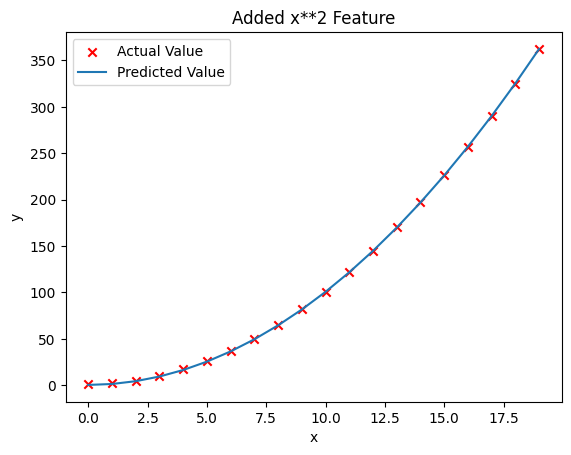

In [76]:
#plot of real values, and predicted value= (x**2)*w+b
plt.scatter(x, y, marker='x', color='red', label="Actual Value")
plt.plot(x, np.dot(X,w)+b, label="Predicted Value")

plt.title("Added x**2 Feature")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [85]:
#Real Values: y=x**2
x=np.arange(0,20,1)
y=x**2
print(x)
print(y)

#trying predicted value to be= (w1*x)+(w2*(x**2))+(w3*(x**3))+b
X=np.c_[x,x**2,x**3]
print(X)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289 324 361]
[[   0    0    0]
 [   1    1    1]
 [   2    4    8]
 [   3    9   27]
 [   4   16   64]
 [   5   25  125]
 [   6   36  216]
 [   7   49  343]
 [   8   64  512]
 [   9   81  729]
 [  10  100 1000]
 [  11  121 1331]
 [  12  144 1728]
 [  13  169 2197]
 [  14  196 2744]
 [  15  225 3375]
 [  16  256 4096]
 [  17  289 4913]
 [  18  324 5832]
 [  19  361 6859]]


In [86]:
#note: np.c_[array1, array2] concatenates arrays column wise
a=np.arange(3)
b=5*np.arange(3)+3
print("a=",a)
print("b=",b)
print("c=",np.c_[a,b])

a= [0 1 2]
b= [ 3  8 13]
c= [[ 0  3]
 [ 1  8]
 [ 2 13]]


In [87]:
w,b= gradient_descent(X,y,1e-7,10000)

Iteration    0: Cost1.14029e+03
Iteration 1000: Cost3.28539e+02
Iteration 2000: Cost2.80443e+02
Iteration 3000: Cost2.39389e+02
Iteration 4000: Cost2.04344e+02
Iteration 5000: Cost1.74430e+02
Iteration 6000: Cost1.48896e+02
Iteration 7000: Cost1.27100e+02
Iteration 8000: Cost1.08495e+02
Iteration 9000: Cost9.26132e+01
w=[0.08237526 0.53552137 0.02752216], b=0.010561850529563568


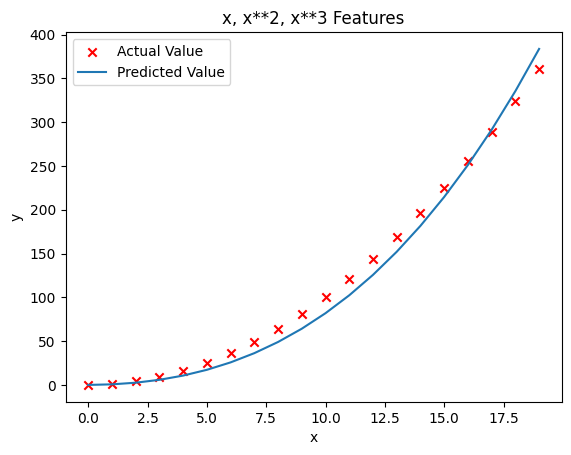

In [88]:
#plot of real values, and predicted value= (w1*x)+(w2*(x**2))+(w3*(x**3))+b
plt.scatter(x, y, marker='x', color='red', label="Actual Value")
plt.plot(x, np.dot(X,w)+b, label="Predicted Value")

plt.title("x, x**2, x**3 Features")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

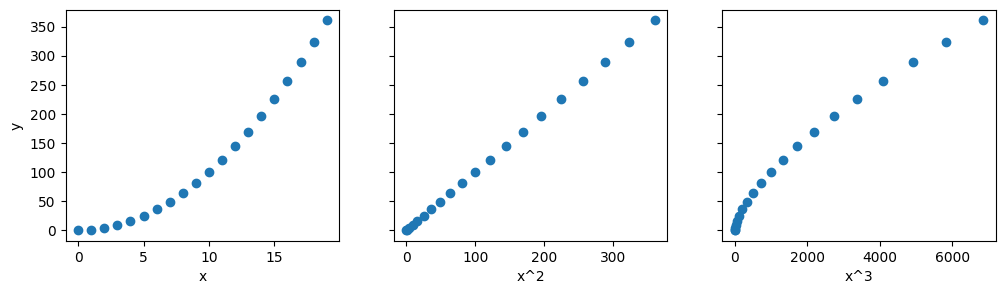

In [89]:
X_features = ['x','x^2','x^3']
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

In [90]:
#since we are using polynomial regression, feature scaling is essential. so:
X_norm= (X-np.mean(X,axis=0))/np.std(X,axis=0)
print(X)
print()
print(X_norm)

[[   0    0    0]
 [   1    1    1]
 [   2    4    8]
 [   3    9   27]
 [   4   16   64]
 [   5   25  125]
 [   6   36  216]
 [   7   49  343]
 [   8   64  512]
 [   9   81  729]
 [  10  100 1000]
 [  11  121 1331]
 [  12  144 1728]
 [  13  169 2197]
 [  14  196 2744]
 [  15  225 3375]
 [  16  256 4096]
 [  17  289 4913]
 [  18  324 5832]
 [  19  361 6859]]

[[-1.64750894 -1.08815641 -0.86396619]
 [-1.47408695 -1.07934543 -0.86348754]
 [-1.30066495 -1.05291248 -0.86013698]
 [-1.12724296 -1.00885756 -0.8510426 ]
 [-0.95382097 -0.94718068 -0.83333249]
 [-0.78039897 -0.86788183 -0.80413474]
 [-0.60697698 -0.77096102 -0.76057744]
 [-0.43355498 -0.65641824 -0.69978868]
 [-0.26013299 -0.52425349 -0.61889656]
 [-0.086711   -0.37446678 -0.51502915]
 [ 0.086711   -0.2070581  -0.38531456]
 [ 0.26013299 -0.02202746 -0.22688087]
 [ 0.43355498  0.18062515 -0.03685618]
 [ 0.60697698  0.40089973  0.18763144]
 [ 0.78039897  0.63879627  0.44945388]
 [ 0.95382097  0.89431478  0.75148306]
 [ 1.12724296 

In [91]:
print("Raw ptp: ",np.ptp(X,axis=0))
print("Norm ptp: ",np.ptp(X_norm,axis=0))

Raw ptp:  [  19  361 6859]
Norm ptp:  [3.29501788 3.18076489 3.28307153]


In [92]:
w,b= gradient_descent(X_norm,y,1e-1,100000)

Iteration    0: Cost9.42147e+03
Iteration 10000: Cost3.90938e-01
Iteration 20000: Cost2.78389e-02
Iteration 30000: Cost1.98242e-03
Iteration 40000: Cost1.41169e-04
Iteration 50000: Cost1.00527e-05
Iteration 60000: Cost7.15855e-07
Iteration 70000: Cost5.09763e-08
Iteration 80000: Cost3.63004e-09
Iteration 90000: Cost2.58497e-10
w=[5.26616827e-05 1.13494579e+02 8.43238778e-05], b=123.49999999999994


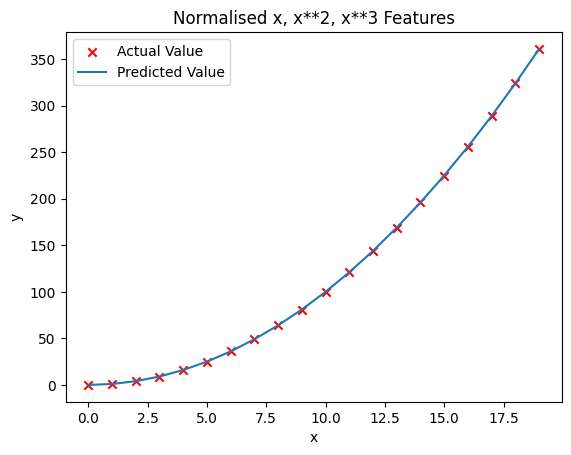

In [94]:
#plot of real values, and predicted value= (w1*x)+(w2*(x**2))+(w3*(x**3))+b
plt.scatter(x, y, marker='x', color='red', label="Actual Value")
plt.plot(x, np.dot(X_norm,w)+b, label="Predicted Value")

plt.title("Normalised x, x**2, x**3 Features")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [95]:
#complex functions
x= np.arange(1,20,1)
y= np.cos(x/2)
print(x)
print(y)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0.87758256  0.54030231  0.0707372  -0.41614684 -0.80114362 -0.9899925  -0.93645669 -0.65364362 -0.2107958   0.28366219  0.70866977  0.96017029  0.97658763  0.75390225  0.34663532 -0.14550003 -0.6020119  -0.91113026 -0.99717216]


In [99]:
#Polynomial Regression: 
X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X_norm= (X-np.mean(X,axis=0))/(np.std(X,axis=0))

In [100]:
w,b= gradient_descent(X_norm,y,1e-1,1000000)

Iteration    0: Cost2.16329e-01
Iteration 100000: Cost1.18818e-02
Iteration 200000: Cost1.18818e-02
Iteration 300000: Cost1.18818e-02
Iteration 400000: Cost1.18818e-02
Iteration 500000: Cost1.18818e-02
Iteration 600000: Cost1.18818e-02
Iteration 700000: Cost1.18818e-02
Iteration 800000: Cost1.18818e-02
Iteration 900000: Cost1.18818e-02
w=[-3.90816038e+00 -6.63867232e-02  1.83361880e+01 -2.10120820e+00 -1.78372515e+01 -1.11415896e+01  1.64246398e+01  9.50695342e-03 -1.59741017e-03  3.65887083e-02  7.30148953e-02 -2.94717327e-02  6.20292780e-02], b=-0.06030231037456798


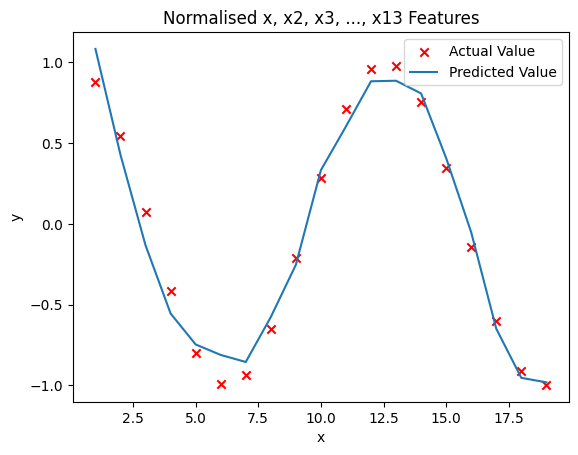

In [103]:
plt.scatter(x, y, marker='x', color='red', label="Actual Value")
plt.plot(x, np.dot(X_norm,w)+b, label="Predicted Value")

plt.title("Normalised x, x2, x3, ..., x13 Features")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()